In [1]:
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt 
from annfuncs import *

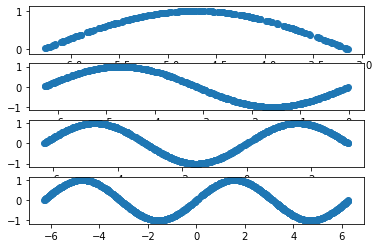

In [2]:
#creating sin data
import random
inputvals=[]
outputvals=[]

for i in range(0,4):
    for j in range(0,250):
        x=random.uniform(-2*math.pi + i*math.pi,-1*math.pi+i*math.pi)
        inputvals.append(x)
        y=math.sin(x)
        outputvals.append(y)
    plt.subplot(4,1,i+1)
    plt.scatter(inputvals,outputvals) 



In [3]:
# test values
test=[]
for j in range(0,300):
        test.append(random.uniform(-2*math.pi,2*math.pi))
        

In [4]:
# layers_dims = [1,275,175,50,1] #  4-layer 
# layers_dims = [1,80,40,20,1] #  4-layer model
layers_dims = [1,10,5,1] #  4-layer model

train_x=np.array(inputvals).reshape(1,1000)
train_y=np.array(outputvals).reshape(1,1000)

In [5]:
train_y.shape

(1, 1000)

Cost after epoch 0: 1.507167
Cost after epoch 1: 1.481381
Cost after epoch 2: 1.453498
Cost after epoch 3: 1.418776
Cost after epoch 4: 1.379508
Cost after epoch 5: 1.341196
Cost after epoch 6: 1.300749
Cost after epoch 7: 1.258853
Cost after epoch 8: 1.209479
Cost after epoch 9: 1.162286
Cost after epoch 10: 1.112331
Cost after epoch 11: 1.067599
Cost after epoch 12: 1.018770
Cost after epoch 13: 0.971330
Cost after epoch 14: 0.938548
Cost after epoch 15: 0.915629
Cost after epoch 16: 0.897071
Cost after epoch 17: 0.882658
Cost after epoch 18: 0.869581
Cost after epoch 19: 0.852053
Cost after epoch 20: 0.835571
Cost after epoch 21: 0.816823
Cost after epoch 22: 0.798184
Cost after epoch 23: 0.779715
Cost after epoch 24: 0.764023
Cost after epoch 25: 0.747011
Cost after epoch 26: 0.727272
Cost after epoch 27: 0.708027
Cost after epoch 28: 0.690660
Cost after epoch 29: 0.672973
Cost after epoch 30: 0.653418
Cost after epoch 31: 0.637523
Cost after epoch 32: 0.619384
Cost after epoch 33:

Cost after epoch 334: 0.090576
Cost after epoch 335: 0.089978
Cost after epoch 336: 0.089917
Cost after epoch 337: 0.089299
Cost after epoch 338: 0.089760
Cost after epoch 339: 0.089088
Cost after epoch 340: 0.088644
Cost after epoch 341: 0.089017
Cost after epoch 342: 0.088338
Cost after epoch 343: 0.087977
Cost after epoch 344: 0.087469
Cost after epoch 345: 0.087797
Cost after epoch 346: 0.087536
Cost after epoch 347: 0.087083
Cost after epoch 348: 0.086708
Cost after epoch 349: 0.086680
Cost after epoch 350: 0.086469
Cost after epoch 351: 0.086754
Cost after epoch 352: 0.085951
Cost after epoch 353: 0.085912
Cost after epoch 354: 0.085655
Cost after epoch 355: 0.085369
Cost after epoch 356: 0.085065
Cost after epoch 357: 0.085168
Cost after epoch 358: 0.084906
Cost after epoch 359: 0.084600
Cost after epoch 360: 0.084456
Cost after epoch 361: 0.084414
Cost after epoch 362: 0.084169
Cost after epoch 363: 0.084001
Cost after epoch 364: 0.083602
Cost after epoch 365: 0.083483
Cost aft

Cost after epoch 693: 0.070612
Cost after epoch 694: 0.071431
Cost after epoch 695: 0.071204
Cost after epoch 696: 0.070717
Cost after epoch 697: 0.070738
Cost after epoch 698: 0.070693
Cost after epoch 699: 0.070384
Cost after epoch 700: 0.070690
Cost after epoch 701: 0.071005
Cost after epoch 702: 0.070615
Cost after epoch 703: 0.071048
Cost after epoch 704: 0.070585
Cost after epoch 705: 0.070644
Cost after epoch 706: 0.070688
Cost after epoch 707: 0.070424
Cost after epoch 708: 0.070562
Cost after epoch 709: 0.070507
Cost after epoch 710: 0.071023
Cost after epoch 711: 0.070680
Cost after epoch 712: 0.071270
Cost after epoch 713: 0.070660
Cost after epoch 714: 0.071032
Cost after epoch 715: 0.070978
Cost after epoch 716: 0.070810
Cost after epoch 717: 0.070508
Cost after epoch 718: 0.070434
Cost after epoch 719: 0.070279
Cost after epoch 720: 0.070411
Cost after epoch 721: 0.071087
Cost after epoch 722: 0.070597
Cost after epoch 723: 0.070427
Cost after epoch 724: 0.070375
Cost aft

Cost after epoch 983: 0.063048
Cost after epoch 984: 0.063125
Cost after epoch 985: 0.062484
Cost after epoch 986: 0.062773
Cost after epoch 987: 0.062818
Cost after epoch 988: 0.062642
Cost after epoch 989: 0.062433
Cost after epoch 990: 0.062602
Cost after epoch 991: 0.062882
Cost after epoch 992: 0.062200
Cost after epoch 993: 0.063221
Cost after epoch 994: 0.062262
Cost after epoch 995: 0.062015
Cost after epoch 996: 0.062432
Cost after epoch 997: 0.062276
Cost after epoch 998: 0.062304
Cost after epoch 999: 0.061503


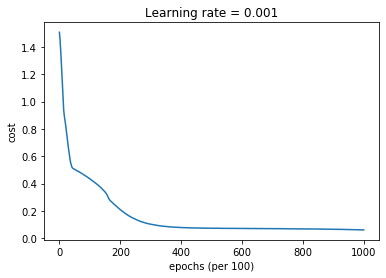

In [6]:
# parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 5000,learning_rate = 0.001, print_cost = True,
#                            lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8,activation='tanh',
#                           regularisation='L2')

parameters = L_layer_model_minib(train_x, train_y, layers_dims, valid=False, num_iterations = 1000,learning_rate = 0.001, 
                            print_cost = True,lambd=0.1,optimizer="adam", beta = 0.9,beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8,
                            activation='tanh',regularisation='none',mini_batch_size=256,cost_func="mse")

In [7]:
pred_train = predictvals(train_x, parameters,activation='tanh')
# cost=predictacc(train_x,train_y,parameters)

In [8]:
pprint(pred_train)
# pprint(train_x)

array([[ 0.80071138,  0.9856549 ,  0.99812879,  0.33290253,  0.97837331,
         0.96310291,  0.99826374,  0.98878399,  0.22818587,  0.33639724,
         0.98669837,  0.82017688,  0.99678867,  0.85083827,  0.95800946,
         0.91992141,  0.83269974,  0.94898044,  0.16749913,  0.97812155,
         0.50886107,  0.17130981,  0.79748538,  0.98227378,  0.97248258,
         0.77333212,  0.90328281,  0.86600433,  0.99517502,  0.61012322,
         0.97212922,  0.90628699,  0.98822345,  0.92645887,  0.99549228,
         0.94041452,  0.00554846,  0.89658331,  0.84069036,  0.57162493,
         0.88953009,  0.85036642,  0.95373768,  0.9754766 ,  0.9740791 ,
         0.77333809,  0.87951904,  0.91931651,  0.41832868,  0.99409148,
         0.09212861,  0.9799177 ,  0.82379294,  0.55471476,  0.98355211,
         0.78850135,  0.17741686,  0.99186766,  0.97731092,  0.74055791,
         0.99687699,  0.99667381,  0.95303467,  0.99719336,  0.56893361,
         0.97912459,  0.9699405 ,  0.99820415,  0.9

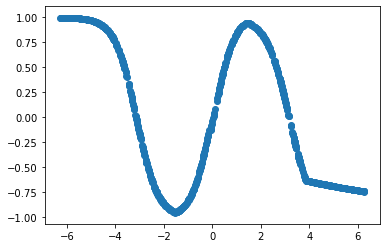

In [9]:
plt.scatter(train_x[0],pred_train[0])

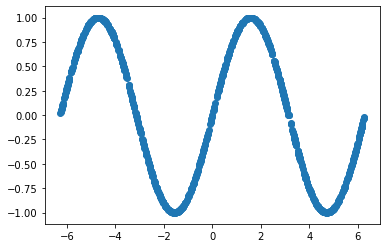

In [10]:
plt.scatter(train_x[0],train_y[0])

In [11]:
test_x=np.array(test).reshape(1,300)
pred_test = predictvals(test_x, parameters,activation='tanh')

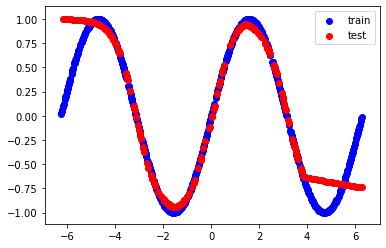

In [12]:
plt.scatter(train_x[0],train_y[0],color='blue')
plt.scatter(test_x[0],pred_test[0],color='red')
plt.legend(['train','test'])
plt.show()

In [13]:
mape=predictmape(train_x,train_y,parameters,lambd=0.1,activation='tanh')
print(mape)

63.89556234427928


In [14]:
valid_err=predicterr(train_x,train_y,parameters,lambd=0.1,activation='tanh',regularisation='L2',cost_func='mse')

In [15]:
print(valid_err)

0.049336977285231516
